In [155]:
# Reference:
# https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
# https://www.youtube.com/watch?v=e8Yw4alG16Q

In [156]:
import pandas as pd

df = pd.read_csv('data/gold_prices_usd.csv')
df.head()

pd.to_datetime(df.date, infer_datetime_format=True)

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
813   2017-10-01
814   2017-11-01
815   2017-12-01
816   2018-01-01
817   2018-02-01
Name: date, Length: 818, dtype: datetime64[ns]

# Methods to Check Stationarity

### Visual Test

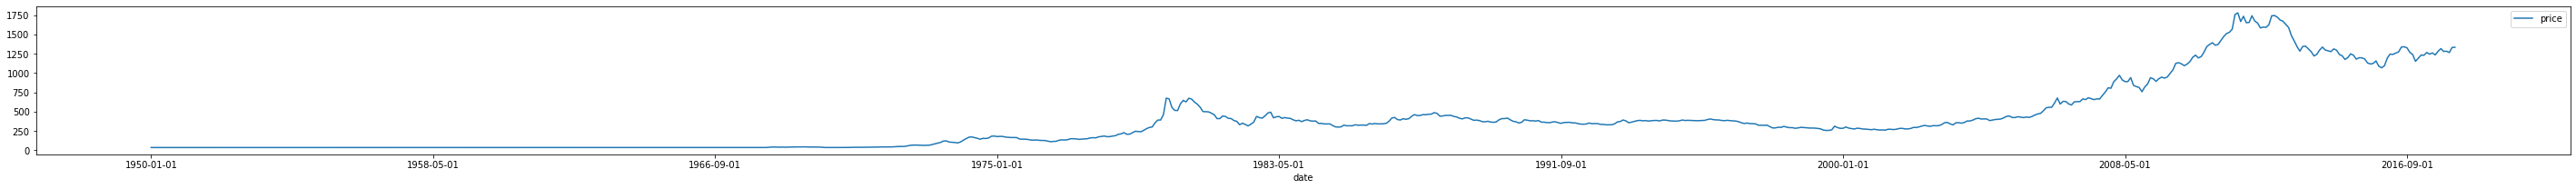

In [157]:
from matplotlib import pyplot as plt

df.set_index('date', inplace=True)
df.plot()
plt.show()

### Dickey-Fuller Test

In [158]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(df)
# Series is not stationary

Results of Dickey-Fuller Test:
Test Statistic                  -0.259757
p-value                          0.931014
#Lags Used                      11.000000
Number of Observations Used    806.000000
Critical Value (1%)             -3.438489
Critical Value (5%)             -2.865133
Critical Value (10%)            -2.568683
dtype: float64


### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

In [159]:
# (DIFFERENT HYPOTHESIS FRAMING w.r.t ADF)

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value

    print (kpss_output)

In [160]:
kpss_test(df)
# Series is not stationary

Results of KPSS Test:
Test statistic            2.983118
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/ahsan/.local/share/virtualenvs/openDS-MZRDdKgs/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Types of Stationarity

# Making a Time Series Stationary

### Differencing

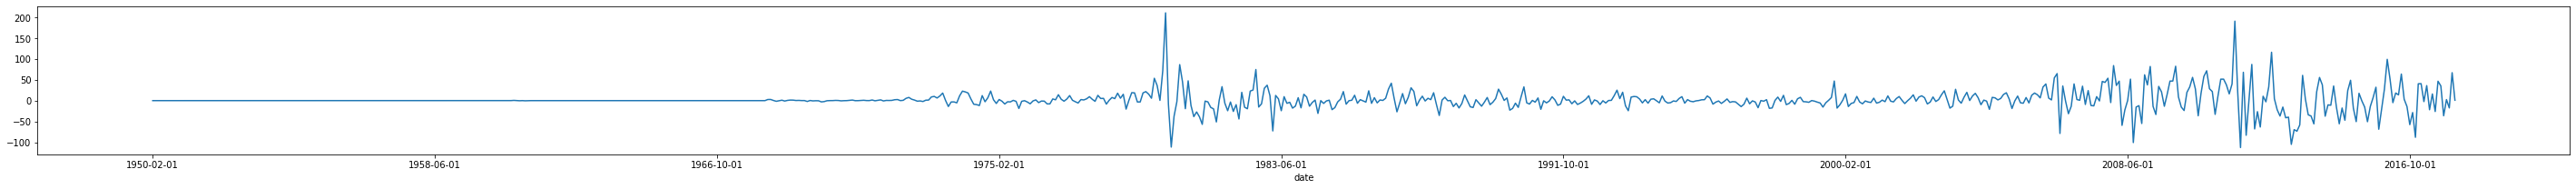

In [161]:
df['new_price_consecutive_diff'] = df['price'] - df['price'].shift(1)
df['new_price_consecutive_diff'].dropna().plot()

plt.show()

In [162]:
df_select = df.new_price_consecutive_diff.dropna()

adf_test(df_select)
# Series is stationary

Results of Dickey-Fuller Test:
Test Statistic                -6.945730e+00
p-value                        9.983945e-10
#Lags Used                     1.000000e+01
Number of Observations Used    8.060000e+02
Critical Value (1%)           -3.438489e+00
Critical Value (5%)           -2.865133e+00
Critical Value (10%)          -2.568683e+00
dtype: float64


In [163]:
kpss_test(df_select)
# Series is stationary

Results of KPSS Test:
Test statistic           0.263615
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/ahsan/.local/share/virtualenvs/openDS-MZRDdKgs/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


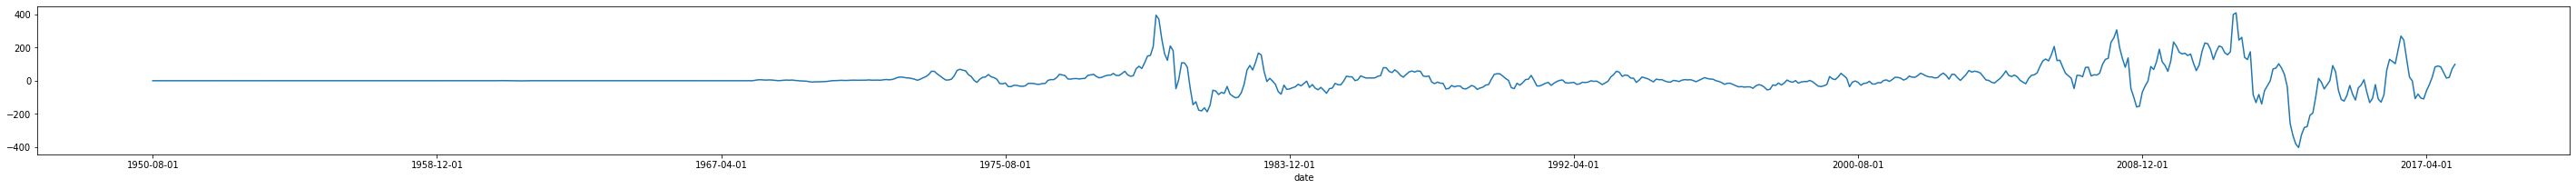

In [164]:
# In seasonal differencing we calculate the difference between an observation and a previous observation from the same season.

n=7
# Week time
df['new_price_week_diff'] = df['price'] - df['price'].shift(n)
df['new_price_week_diff'].dropna().plot()

plt.rcParams["figure.figsize"] = (50,3)
plt.show()

In [165]:
df_select = df.new_price_week_diff.dropna()

adf_test(df_select)
# Series is stationary

Results of Dickey-Fuller Test:
Test Statistic                  -4.298238
p-value                          0.000447
#Lags Used                      21.000000
Number of Observations Used    789.000000
Critical Value (1%)             -3.438665
Critical Value (5%)             -2.865210
Critical Value (10%)            -2.568724
dtype: float64


In [166]:
kpss_test(df_select)
# Series is not stationary

Results of KPSS Test:
Test statistic            0.202519
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/ahsan/.local/share/virtualenvs/openDS-MZRDdKgs/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


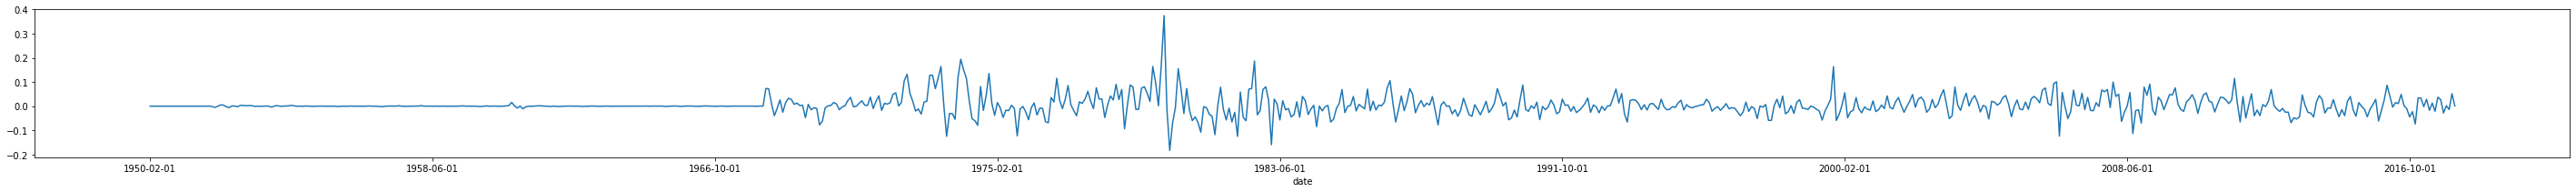

In [167]:
# Transformations are used to stabilize the non-constant variance of a series.
# Common transformation methods include power transform, square root, and log transform.

import numpy as np

df['price_log'] = np.log(df['price'])
df['price_log_diff'] = df['price_log'] - df['price_log'].shift(1)
df['price_log_diff'].dropna().plot()

plt.show()

In [168]:
df_select = df.price_log_diff.dropna()

adf_test(df_select)
# Series is stationary

Results of Dickey-Fuller Test:
Test Statistic                -5.822881e+00
p-value                        4.143388e-07
#Lags Used                     1.700000e+01
Number of Observations Used    7.990000e+02
Critical Value (1%)           -3.438561e+00
Critical Value (5%)           -2.865164e+00
Critical Value (10%)          -2.568700e+00
dtype: float64


In [169]:
kpss_test(df_select)
# Series is stationary

Results of KPSS Test:
Test statistic           0.124921
p-value                  0.100000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/ahsan/.local/share/virtualenvs/openDS-MZRDdKgs/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [170]:
df.tail(10)

,price,new_price_consecutive_diff,new_price_week_diff,price_log,price_log_diff
date,,,,,
2017-05-01,1245.250,-21.900,-23.679,7.127092,-0.017434
2017-06-01,1261.277,16.027,20.984,7.139880,0.012788
2017-07-01,1235.100,-26.177,82.935,7.118907,-0.020973
2017-08-01,1281.720,46.620,89.072,7.155958,0.037051
2017-09-01,1317.045,35.325,83.655,7.183146,0.027188
2017-10-01,1280.677,-36.368,49.614,7.155144,-0.028002
2017-11-01,1283.189,2.512,16.039,7.157104,0.001960
2017-12-01,1265.674,-17.515,20.424,7.143360,-0.013744
2018-01-01,1332.809,67.135,71.532,7.195044,0.051684
